# Visualizing Earnings Based On College Majors

In this project, I worked with dataset on job outcomes of college graduates based on their major. The original data was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/). The version used for this project is released by FiveThirtyEight on [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Some of the columns in this dataset are:

- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.


The goal of this project is to make meaningful observations using the visualization tools provided by Matplotlib. Some of the questions answered in this project were: 

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category has the most number of majors?


# Exploring Data

The first step of this analysis is to take a general look at the data and to become familiar with how it is structured.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')


In [6]:
recent_grads = recent_grads.dropna()
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Above is the first few lines of the data. Here we can find some variables useful for analysis. 

**Do students in more popular majors make more money?**
- sample_size and Median (median salary)


**How many majors are predominantly male? Predominantly female?**
- ShareWomen (share of women graduates)
- Men and Women

**Which category has most number of majors?**
- Major_category

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


The above statistics shows the general range for each column. There are total of 172 majors (each ranked in numbers from 1 to 173). The total proportion of women is given in the range from 0 to 1, and the average median salary for all the majors is \\$36.000. Knowing the general statistics will help visualizing the variables later.


# Scatter Plot

For this section, we will use scatter plot to answer the following questions. 

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?


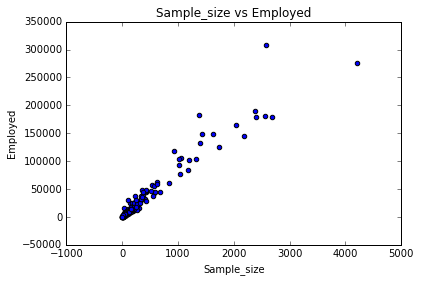

In [8]:
recent_grads.plot(x='Sample_size', y='Employed', kind = 'scatter', title = 'Sample_size vs Employed')

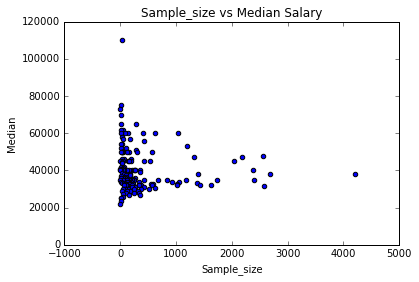

In [9]:
recent_grads.plot(x='Sample_size', y='Median', kind = 'scatter', title = 'Sample_size vs Median Salary')

**Do students in more popular majors make more money?**

This is not necessarily true. Students in more popular majors tend to make mid-range salary (\\$30,000 to $60,000). 
Median salary tends to vary greatly for majors that have less than 500 students. 

Comparing the number of employment with sample size, we can tell that more people are employed for popular majors, but this does not necessarily mean that students in these majors have more chance to secure employment. The positive correlation is probably due to the sample size itself. Greater sample size means there are greater number of job applicants. However, this does support the observation that there are more positions available for popular majors. Otherwise, the number of employment will not increase with the sample size. 


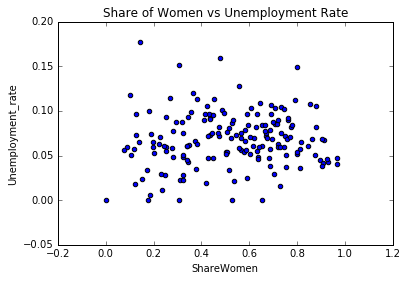

In [10]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind = 'scatter', title = 'Share of Women vs Unemployment Rate')

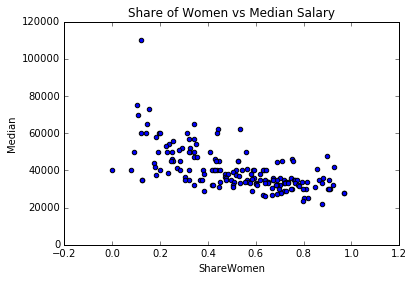

In [11]:
recent_grads.plot(x='ShareWomen', y='Median', kind = 'scatter', title = 'Share of Women vs Median Salary')

**Do students that majored in subjects that were majority female make more money?**

Students majored in female-majority subjects tend to make less money. The scatter plot above comparing the percentage of female graduates with the median salary shows negative correlation. However, we may not conclude that gender discrimination exists based on this correlation alone. Gender discrimination could very well be the cause, but it is also possible that more women tend to choose majors with less median salary. 

It does not seem like students majored in female-majority subjects are less likely to get employed. There is no correlation between the share of women graduates and the unemployment rate.



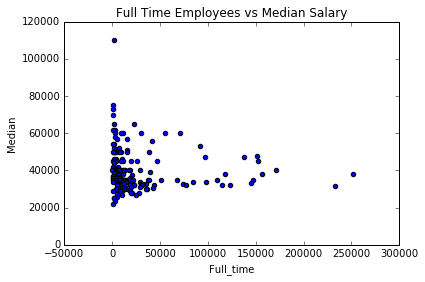

In [12]:
recent_grads.plot(x='Full_time', y='Median', kind = 'scatter', title = 'Full Time Employees vs Median Salary')

**Is there any link between the number of full-time employees and median salary?**

As the number of full-time employee increases, salary tends to stabilize into the middle range (\\$30,000 to $50,000). 


# Histogram

Next, we will use histogram to explore the following questions:
- What percent of majors are predominantly male? Predominantly female?
- What is the most common median salary range?

(0.6, 0.8]       0.313953
(0.4, 0.6]       0.261628
(0.2, 0.4]       0.209302
(-0.001, 0.2]    0.110465
(0.8, 1.0]       0.104651
Name: ShareWomen, dtype: float64

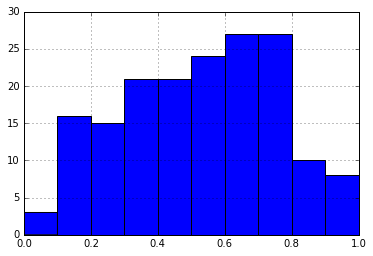

In [13]:
recent_grads['ShareWomen'].hist(range=(0,1))

recent_grads['ShareWomen'].value_counts(
    bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
        )/recent_grads['ShareWomen'].value_counts().sum()

**What percent of majors are predominantly male? Predominantly female?**

- 11% of majors are predominantly male (0 - 0.2)
- 10% of majors are predominantly female (0.8 - 1.0)



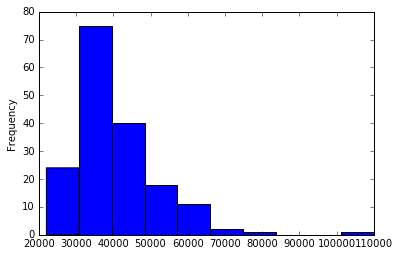

In [14]:
recent_grads['Median'].plot(kind = 'hist')

**What's the most common median salary range?**

The most common range is \\$30,000 to $40,000 for median salary.

# Scatter Matrix Plot

Next, we want to use integrative scatter matrix plot to come up with observations of different variables. 

We will make a few scatter matrix plots:

- Sample_size vs Median
- Sample_size, Median, and Unemployment_rate


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01793dfeb8>,
      dtype=object)

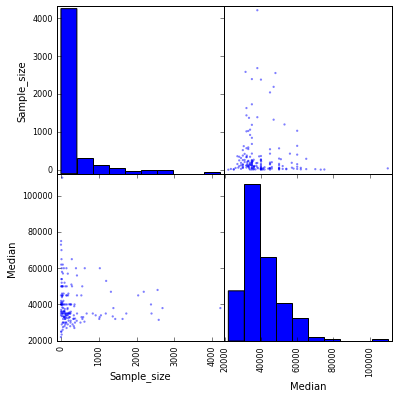

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01791c9128>,
      dtype=object)

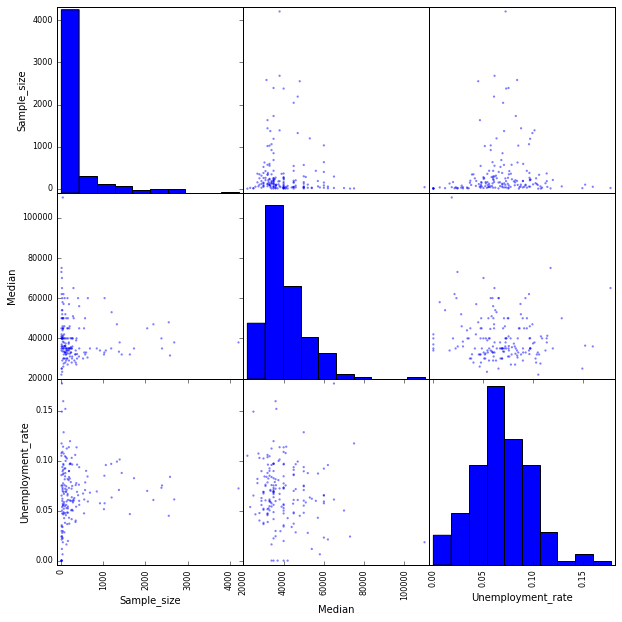

In [16]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

**Observations:**
The above scatter matrix plot allows us to analyze the data from different perspectives: 

- Sample size shows some correlation with both the median salary and unemployment rate. (Greater sample size tends to bring both variables into the middle range)

- Majors with lower median salary tends to have median unemployment rate.
(This is not so obvious in the scatter plot with median as the x axis, but more evident in the scatter plot with unemployment_rate as the x axis.)

If an entering student want a high starting salary, it might be wise to get into a major with student population below 500. While there is more number of positions available for popular majors, the competition balances the supply out. 

If an entering student does not care too much about high starting salary but more about job security, it is safer to apply to majors with greater sample size. Both the unemployment rate and median range tends to be in the middle for popular majors. 

# Bar Plots

In [17]:
recent_grads['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources         9
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

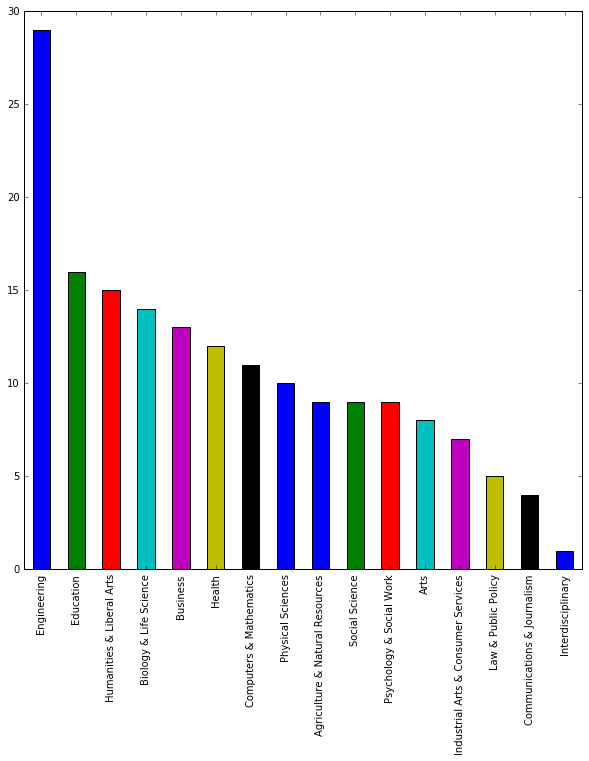

In [18]:
recent_grads['Major_category'].value_counts().plot(kind='bar', figsize = (10,10), rot= 90)

**Which category has most number of majors?**

'Engineering' has most number of majors, followed by 'Education' and 'Humanities & Liberal Arts'. 